# Intoduction TO Regression

In regression tasks target variable typically has continous variables such as GDP of a country or house predictions.

In [15]:
# Lets start by using women's health dataset to predict blood glucose levels.
import pandas as pd
import numpy as np
diabetes_df = pd.read_csv(r"C:\Users\anoushka chatterjee\Desktop\Data camp\archive\Diabetes.csv")
print(diabetes_df.head())

   pregnancies  glucose  diastolic  triceps  insulin   bmi    dpf  age  \
0            6      148         72       35        0  33.6  0.627   50   
1            1       85         66       29        0  26.6  0.351   31   
2            8      183         64        0        0  23.3  0.672   32   
3            1       89         66       23       94  28.1  0.167   21   
4            0      137         40       35      168  43.1  2.288   33   

   diabetes  
0         1  
1         0  
2         1  
3         0  
4         1  


In [2]:
x = diabetes_df.drop("glucose",axis=1).values
y=diabetes_df["glucose"].values
print(type(x),type(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [3]:
x_bmi = x[:,3]
print(y.shape, x_bmi.shape)


(768,) (768,)


In [4]:
x_bmi = x_bmi.reshape(-1,1)
print(x_bmi.shape) 

(768, 1)


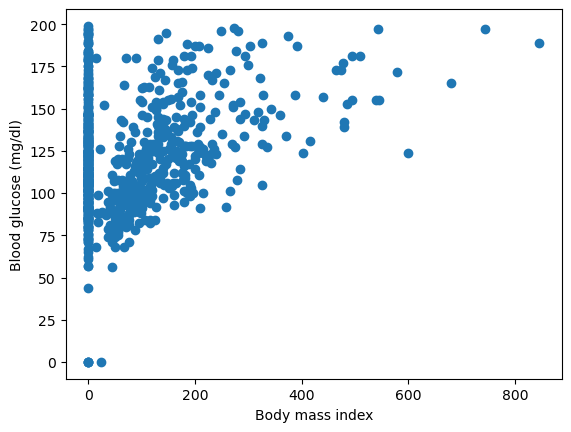

In [5]:
import matplotlib.pyplot as plt
plt.scatter(x_bmi, y)
plt.ylabel("Blood glucose (mg/dl)")
plt.xlabel("Body mass index")
plt.show()

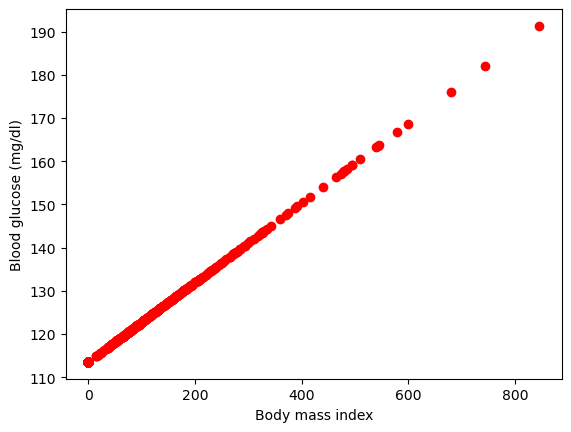

In [6]:
# fitting a regression model - linear regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_bmi, y)
predictions = reg.predict(x_bmi)
plt.scatter(x_bmi, predictions, color = "red")
plt.ylabel("Blood glucose (mg/dl)")
plt.xlabel("Body mass index")
plt.show()

### Regression Mechanics
y=ax+b 

simple linear regression uses one feature

- y= target
- x= single feature
- a,b= parameters/coefficients of the model - slope, intercept

how do we choose a and b?

- define an error function for any given line.
- choose the line that minimizes the error function (error functions are also called loss or cost functions. 

### Linear regression in higher dimensions
y = a1x1+a2x2+b

TO fit a linear regression model here:
- Need to specify 3 variables: a1, a2, b

In higher dimensions:
- known as multiple regression
- must specify coefficients for each feature and the variable b
  
  y = a1x1+a2x2+a3x3+....+anxn+b

Scikit-learn works exactly the same way:
- pass two arrays: features and target

In [7]:
# linear regression using all features
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
reg_all = LinearRegression()
reg_all.fit(x_train, y_train)
y_pred = reg_all.predict(x_test)

### R-squared
R² : quantifies the variance in target values explained by the features
- values range from 0 to 1


In [8]:
# R- squared in scikit learn
reg_all.score(x_test, y_test)

0.2828046881037515

### Mean squared error and root mean squared error

MSE = (1/n) * Σ(actual – forecast)²
- mse is measured in target units, squared

RMSE = $\sqrt(MSE)$
- Measure RMSE in the same units at the target variable

In [9]:
# calculating RSME
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared= False)

26.34145958223226

### cross-validation motivation
- model performance is dependent on the way we split up the data
- not representative of the model's ability to generalize to unseen data
- solution: cross-validation
  - We begin by splitting the dataset into five groups or folds.
  - then we set aside the first fold as a test set
  - fit out model on the remaining four folds
  - predict on our test set
  - compute the metric of interest.
  - Next we do the same steps in the second fold of our test set and again third, fourth , fifth etc
- we call, 5 folds = 5-fold CV
  - k folds = k-fold CV
  - More folds = more computationally expensive

In [20]:
from sklearn.model_selection import cross_val_score , KFold
kf = KFold(n_splits = 6, shuffle=True, random_state = 42)
reg = LinearRegression()
cv_results = cross_val_score(reg, x , y, cv=kf)
print(cv_results)
print(np.mean(cv_results), np.std(cv_results))
print(np.quantile(cv_results, [0.025, 0.475]))

[0.26207548 0.28228176 0.41203082 0.23785884 0.41634629 0.30398869]
0.31909697867344783 0.07015320610114227
[0.24088592 0.29042186]


### Regularized Regression
A technique used to avoid overfitting. 

Linear regression minimizes a loss function. if there coefficients gets very large it can lead to overfitting. Therefore, it is common practice to alter the loss function so that it penalizes large coefficients. this is called regularization. 

- Ridge regression
  
  - Loss functions = OLS loss function + $\alpha$ * $\sum_{i=1}^{n}$ $ai^2$
    - OLS = ordinary least squares 
  - Ridge penalizes large positive or negative coefficients
  - $\alpha$ : parameter we need to choose
  - picking $\alpha$ is similar to picking k in KNN
  - $\alpha$ = Hyperparameters: variable used to optimize model parameters
  - $\alpha$ controls model complexity
    - $\alpha$ = 0 = OLS (can lead to overfitting)
    - very high $\alpha$: can lead to underfitting​



In [22]:
from sklearn.linear_model import Ridge
scores=[]
for alpha in [0.1,1.0,10.0,100.0,1000.0]:
    ridge = Ridge(alpha=alpha)
    ridge.fit(x_train, y_train)
    y_pred = ridge.predict(x_test)
    scores.append(ridge.score(x_test, y_test))
print(scores)

[0.2828466623222219, 0.28320633574804754, 0.2853000732200003, 0.2642398481266811, 0.19292424694100885]


 - Lasso Regression

   - Loss function OLS loss funtion + $\alpha$ * $\sum_{i=1}^{n}$ $|ai|$

In [25]:
from sklearn.linear_model import Lasso
scores=[]
for alpha in [0.1,1.0,10.0,100.0,1000.0]:
    lasso = Lasso(alpha=alpha)
    lasso.fit(x_train, y_train)
    lasso_pred = lasso.predict(x_test)
    scores.append(lasso.score(x_test, y_test))
print(scores)

[0.2857532569482625, 0.29795609755827845, 0.17989838789273893, 0.10438614467572016, 0.04044144424693341]


- lasso regression for feature selection
  - lasso can select important features of a datset
  - shrinks the coefficients of less important features to zero
  - features not shrunk to zero are selected by lasso

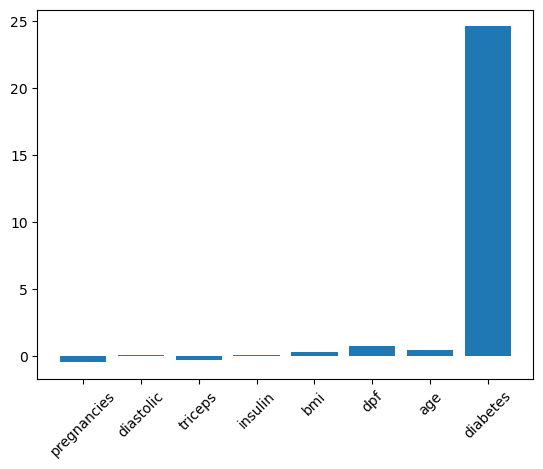

In [28]:
from sklearn.linear_model import Lasso
x = diabetes_df.drop("glucose",axis=1).values
y= diabetes_df["glucose"].values
names = diabetes_df.drop("glucose",axis=1).columns
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(x, y).coef_
plt.bar(names, lasso_coef)
plt.xticks(rotation=45)
plt.show()